In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:
data = np.load('./../../ml/origen/Data.npy', allow_pickle=True).item()

In [5]:
# Print keys in the dictionary
print("Keys in data_dict:", list(data.keys()))


Keys in data_dict: ['pressure', 'u_velocity', 'v_velocity', 'x', 'y']


In [46]:
# Print values associated with a specific key
example_key = 'u_velocity'
print(f"Values for key '{example_key}':", data[example_key].shape)


Values for key 'u_velocity': (61, 61)


In [47]:


# Specify the key for visualization
example_key = 'u_velocity'

# Get the array associated with the key
u_velocity_array = data[example_key]

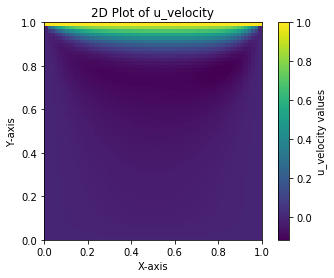

In [48]:
# Create a 2D plot

plt.imshow(u_velocity_array, cmap='viridis', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar(label=f'{example_key} values')
plt.title(f'2D Plot of {example_key}')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

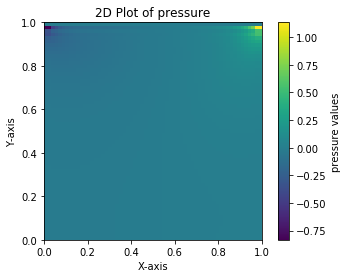

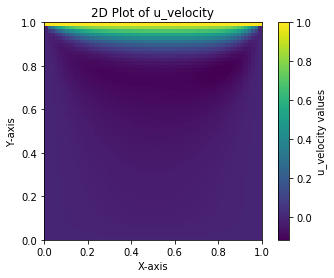

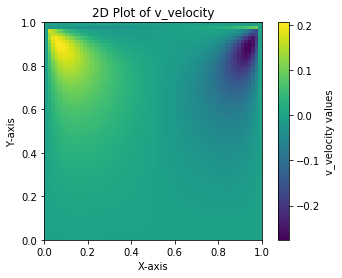

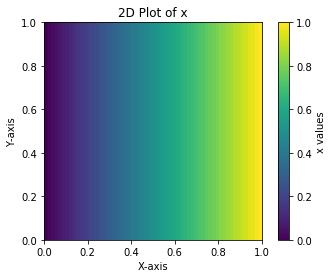

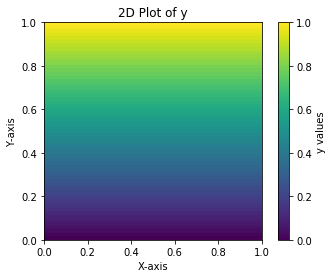

In [49]:
# Loop through all keys in the dictionary
for key in data.keys():
    # Get the array associated with the key
    array_data = data[key]

    # Check if the array is 2D (for simplicity)
    if len(array_data.shape) == 2:
        # Create a 2D plot
        plt.imshow(array_data, cmap='viridis', origin='lower', extent=[0, 1, 0, 1])
        plt.colorbar(label=f'{key} values')
        plt.title(f'2D Plot of {key}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()

as we could see from the plot above 

In [6]:
#getting items from input file 
u_velocity = data['u_velocity']
v_velocity = data['v_velocity']
pressure = data['pressure']
x_coords = data['x']
y_coords = data['y']



In [139]:
#getting items from input file 
print(u_velocity.shape) 
print(v_velocity.shape) 
print(pressure.shape) 
print(x_coords.shape) 
print(y_coords.shape) 



(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)


In [170]:
# Define a 2D CNN model with one convolutional layer
class CNN2DModel(nn.Module):
    def __init__(self):
        super(CNN2DModel, self).__init__()
        self.conv1 = nn.Conv2d(2, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)
     
     #   self.fc = nn.Linear(64 * 61 * 61, 3)  # Output for u, v, and pressure

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
      #
       # output = self.fc(x)

        return x

In [171]:
cnnmodel = CNN2DModel()
cnnmodel

CNN2DModel(
  (conv1): Conv2d(2, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [166]:
x_coords = torch.from_numpy(x_coords).float()
y_coords = torch.from_numpy(y_coords).float()


TypeError: expected np.ndarray (got Tensor)

In [172]:
input_data = torch.stack([x_coords, y_coords],dim = 0)
input_data.shape

torch.Size([2, 61, 61])

In [173]:
output_data = cnnmodel(input_data)

In [174]:
output_data.shape



torch.Size([3, 61, 61])

In [175]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(cnnmodel.parameters(), lr=0.001)


In [ ]:

        # Compute loss
loss = criterion(output_data, torch.cat([u_true_batch, v_true_batch, input_data_batch[:, 2:, :, :]], dim=1))


In [ ]:
# Training loop
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    u_pred, v_pred, p_pred = pinn_model(input_data)

    # Compute loss
    loss = criterion(u_pred, u_true) + criterion(v_pred, v_true) + criterion(p_pred, p_true)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Print loss for monitoring training progress
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Let's see what exactly is happening here

In [90]:
y_coords[1][60]

0.016666666666666666

In [125]:
x_coords[60][1]

0.016666666666666666

In [126]:
pressure[60][1]

0.0

In [ ]:
#x[i][j] == y[j][i]

In [12]:
pressure.shape

(61, 61)

In [ ]:
x_coords[20]

In [ ]:
y_coords[60][60]

In [96]:
print(v_velocity.max())


0.20534974259136154
0


In [117]:
max_value = v_velocity.max()
max_indices = np.where(v_velocity == max_value)
print(max_indices)

(array([54]), array([4]))


In [129]:
x = x_coords[54][4]
print(x)

0.06666666666666667


In [132]:
xF = data['x'].flatten()
xF.shape

(3721,)

In [128]:
y = y_coords[54][4]
print(y)

0.9


In [123]:
x_coords[24][4]

0.06666666666666667

In [124]:
y_coords[4][24]

0.06666666666666667

In [71]:
random_indices = np.random.choice(range(1, 60), size=10, replace=False)
selected_points_x = torch.Tensor(x_coords[random_indices])
selected_points_y = torch.Tensor(y_coords[random_indices])
selected_points_u = torch.Tensor(u_velocity[random_indices])
selected_points_v = torch.Tensor(v_velocity[random_indices])
selected_points_p = torch.Tensor(pressure[random_indices])


In [72]:
# Standardize the input features
scaler = StandardScaler()
selected_points_x = torch.Tensor(scaler.fit_transform(selected_points_x))#.reshape(-1, 1)))
selected_points_y = torch.Tensor(scaler.fit_transform(selected_points_y))#.reshape(-1, 1)))


In [133]:
# Expand dimensions to represent channels (1 channel in this case)
x_expanded = np.expand_dims(x, axis=0)
y_expanded = np.expand_dims(y, axis=0)
pressure_expanded = np.expand_dims(pressure, axis=0)



In [138]:
y_expanded

array([0.9])

In [73]:
selected_points_x.shape

torch.Size([10, 61])

In [74]:
# Concatenate the input features
input_features = torch.cat([selected_points_x, selected_points_y], dim=1)
input_features.shape


torch.Size([10, 122])

In [75]:
# Concatenate velocity and pressure as target variables
targets = torch.cat([selected_points_u, selected_points_v, selected_points_p], dim=1)
targets.shape

torch.Size([10, 183])

In [76]:
# Define the deep learning model
class DeepLearningModel(nn.Module):
    def __init__(self):
        super(DeepLearningModel, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 3)  # 2 outputs for u_velocity and v_velocity

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [77]:
# Instantiate the deep learning model
dl_model = DeepLearningModel()


In [78]:
# Define the loss function
criterion = nn.MSELoss()


In [79]:
# Define the optimizer
optimizer = optim.Adam(dl_model.parameters(), lr=1e-3)

#

In [66]:
torch.cat([selected_points_u, selected_points_v, selected_points_p]).shape

torch.Size([30, 61])

In [80]:
# Training loop
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = dl_model(input_features)
    print(outputs.shape)
    #loss = criterion(outputs, torch.cat([selected_points_u, selected_points_v, selected_points_p], dim=1))
    #print(loss)    
    #loss.backward()
    #optimizer.step()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x122 and 2x50)

In [68]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_features, targets, test_size=0.2, random_state=42)

# Define the neural network model
class FluidModel(nn.Module):
    def __init__(self):
        super(FluidModel, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 3)  # 3 outputs for u_velocity, v_velocity, pressure

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model
fluid_model = FluidModel()

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(fluid_model.parameters(), lr=1e-3)

# Training loop
epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = fluid_model(X_train)
    loss = criterion(predictions, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

# Evaluate the model on the test set
fluid_model.eval()
with torch.no_grad():
    test_predictions = fluid_model(X_test)
    test_loss = criterion(test_predictions, y_test)
    print(f'Test Loss: {test_loss.item()}')

ValueError: Found input variables with inconsistent numbers of samples: [610, 10]

In [ ]:
print(selected_points_x.size())  # Check the size of selected_points_x
print(selected_points_y.size())  # Check the size of selected_points_y
print(selected_points_u.size())

torch.Size([610, 1])
torch.Size([610, 1])
torch.Size([10, 61])
